# Gene expression pattern in 2D

This notebook demonstrates the process of 2D gene expression pattern. This is done in the following two steps.
1. Gene expression change levels along any axis；
2. Transform gene expression change levels into two dimensions by DDRtree.

### Packages

In [1]:
import os
import anndata as ad
import numpy as np
import pandas as pd
import pyvista as pv
import seaborn as sns
import spateo as st

### Data source

In [2]:
tissue = "CNS primordium"

adata = ad.read_h5ad("/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/5_annotation/E8-10_b_all_anno_scsq.h5ad")

data_folder="/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction/E8-10_b_all_anno_scsq/2_reconstruct_tissues/mesh"
pc = st.tdr.read_model(filename=os.path.join(data_folder, "CNS primordium_pc_model.vtk"))
voxel = st.tdr.read_model(filename=os.path.join(data_folder, "CNS primordium_voxel_model.vtk"))
########################################################################################################################
save_folder = r"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction"
save_cellbin_tdr_folder = os.path.join(save_folder, r"E8-10_b_all_anno_scsq")
save_cellbin_tdr_6_folder = os.path.join(save_cellbin_tdr_folder, r"6_gene_expression_pattern_in_2D")
save_cellbin_tdr_mesh_folder = os.path.join(save_cellbin_tdr_6_folder, r"mesh")
save_cellbin_tdr_image_folder = os.path.join(save_cellbin_tdr_6_folder, r"image")

for folder in [save_folder, save_cellbin_tdr_folder, save_cellbin_tdr_6_folder, save_cellbin_tdr_mesh_folder, save_cellbin_tdr_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

### Add original gene expression info to the point cloud model

In [3]:
gene = "Bacc"

obs_index = pc.point_data["obs_index"].tolist()
mkg_exp = adata[obs_index, gene].X.flatten().astype(np.float64)
mkg_exp_adj = mkg_exp.copy()
mkg_exp_adj[mkg_exp_adj <= 0] = 0

mkg_amap = mkg_exp.copy()
mkg_amap = mkg_amap - mkg_amap.min()
mkg_amap = mkg_amap / mkg_amap.max()
mkg_amap[mkg_amap <= 0.1] = 0.1

st.tdr.add_model_labels(model=pc, labels=mkg_exp_adj, key_added=gene, where="point_data", colormap="Purples", alphamap=mkg_amap, inplace=True)

source_pc = pc.copy()
del source_pc.point_data["obs_index"], source_pc.point_data["groups"]
interpolate_voxel = st.tdr.interpolate_model(model=voxel, source=source_pc, N=5, where="point_data", kernel="shepard")

### Gene expression change levels along any axis

#### Along x axis

In [4]:
x_x, x_y, x_slices, x_line = st.tdr.changes_along_line(model=interpolate_voxel, key=gene, vec=(1, 0, 0), center=None)

|-----> Slice the model uniformly along the vector `vec` and generate 100 slices. There are 0 empty slices, 100 valid slices in all slices.


In [5]:
#### Visualization
def plot_2d(x, y, jupyter=False, save_image=None):
    notebook = False if jupyter is False else True
    p = pv.Plotter(notebook=notebook, window_size=(1024, 768), off_screen=True)
    p.background_color = "white"
    chart = pv.Chart2D()
    _ = chart.scatter(x, y, color="tab:orange")
    _ = chart.line(x, y, color="tab:blue", style="--")
    chart.x_label = "Relative position on the axis"
    chart.x_label = "Total gene exp"
    p.add_chart(chart)
    p.show(jupyter_backend=jupyter, screenshot=save_image)

def visualization(slices, line, jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, off_screen=True, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_model(plotter=p, model=slices, key=gene)
        p.add_mesh(mesh=line, color="orangered")
        p.add_axes()
        p.camera_position = cpo
    st.pl.output_plotter(plotter=p, filename=save_image, jupyter=jupyter)

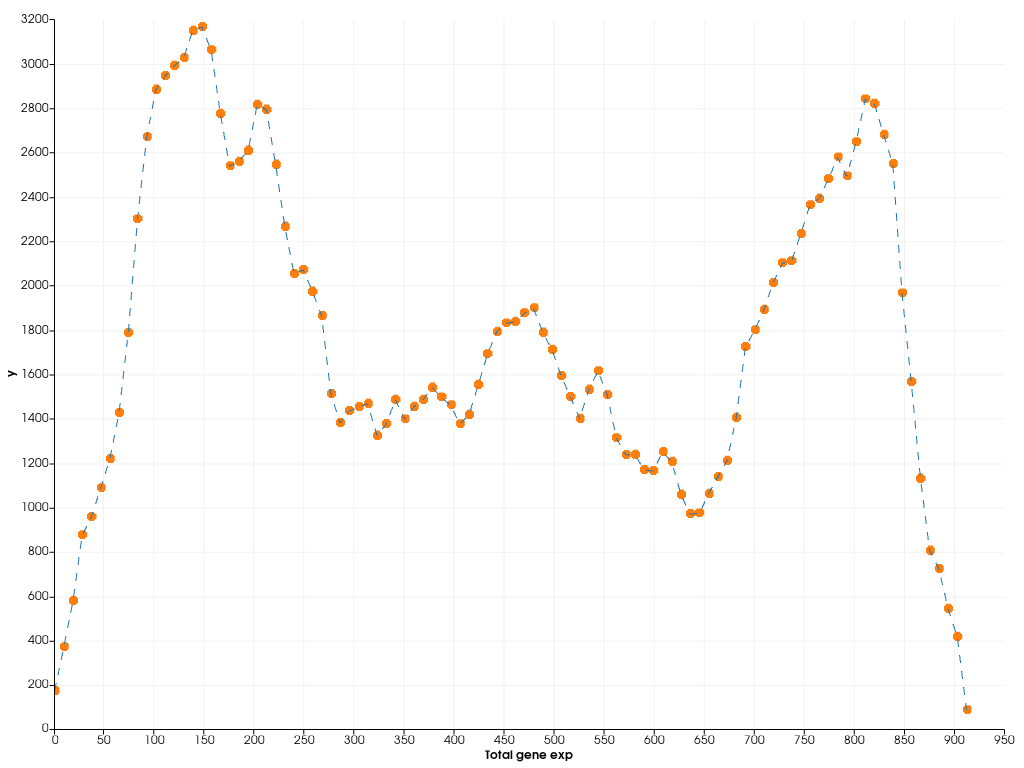

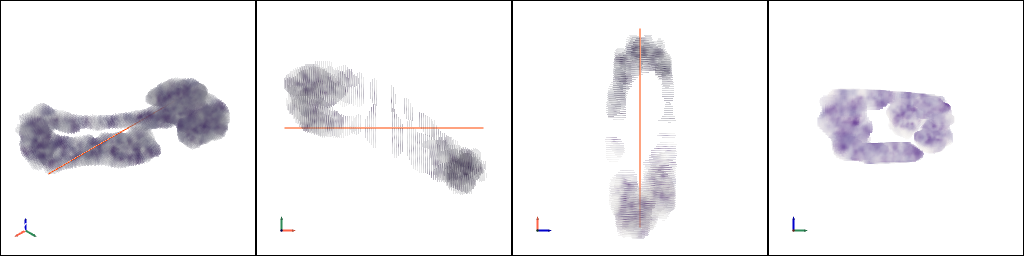

In [6]:
plot_2d(x=x_x, y=x_y, jupyter="static", save_image=None)
plot_2d(x=x_x, y=x_y, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{gene}_along_x_axis.tiff"))
visualization(slices=x_slices, line=x_line, jupyter="static", save_image=None)
visualization(slices=x_slices, line=x_line, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{gene}_slics_along_x_axis.tiff"))

#### Along Y axis

In [7]:
y_x, y_y, y_slices, y_line = st.tdr.changes_along_line(model=interpolate_voxel, key=gene, vec=(0, 1, 0), center=None)

|-----> Slice the model uniformly along the vector `vec` and generate 100 slices. There are 0 empty slices, 100 valid slices in all slices.


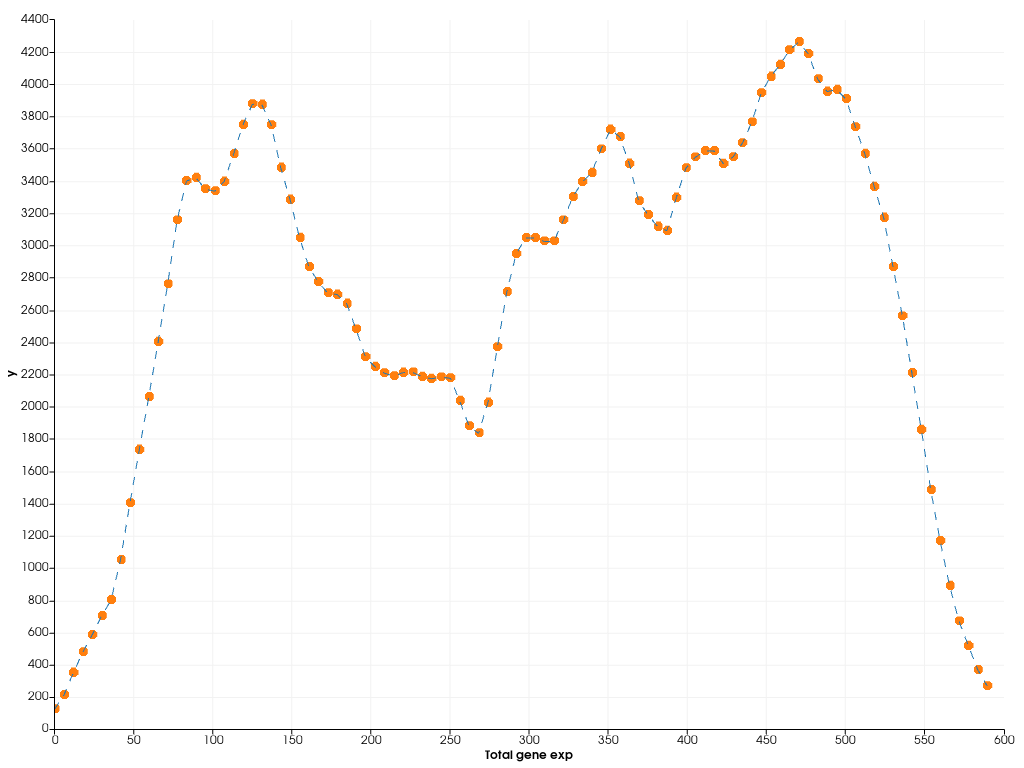

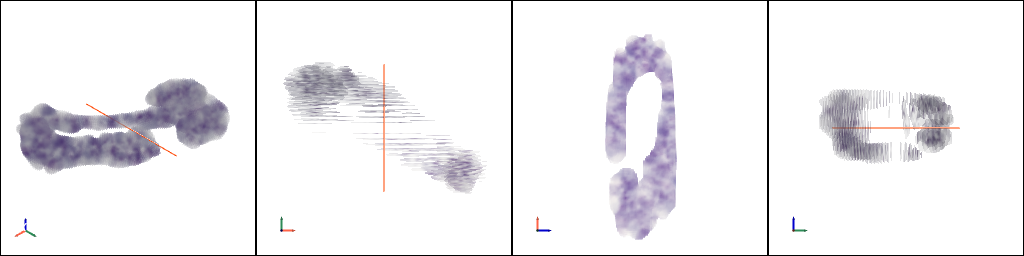

In [8]:
plot_2d(x=y_x, y=y_y, jupyter="static", save_image=None)
plot_2d(x=y_x, y=y_y, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{gene}_along_y_axis.tiff"))
visualization(slices=y_slices, line=y_line, jupyter="static", save_image=None)
visualization(slices=y_slices, line=y_line, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{gene}_slics_along_y_axis.tiff"))

#### Along Z axis

In [9]:
z_x, z_y, z_slices, z_line = st.tdr.changes_along_line(model=interpolate_voxel, key=gene, vec=(0, 0, 1), center=None)

|-----> Slice the model uniformly along the vector `vec` and generate 100 slices. There are 0 empty slices, 100 valid slices in all slices.


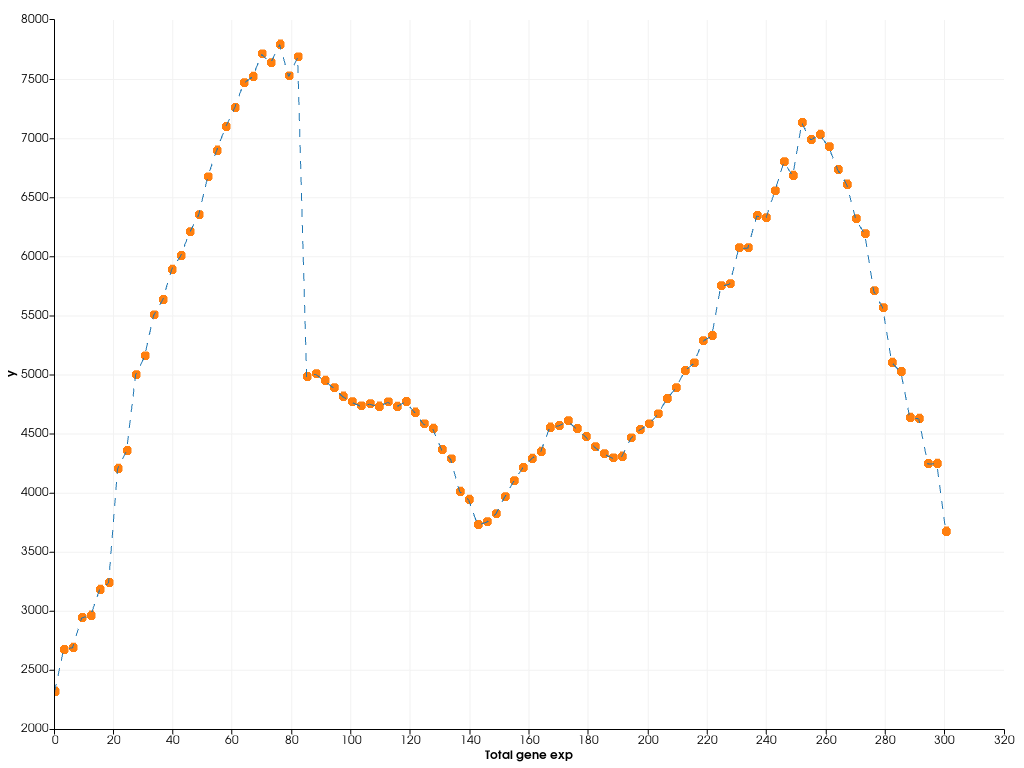

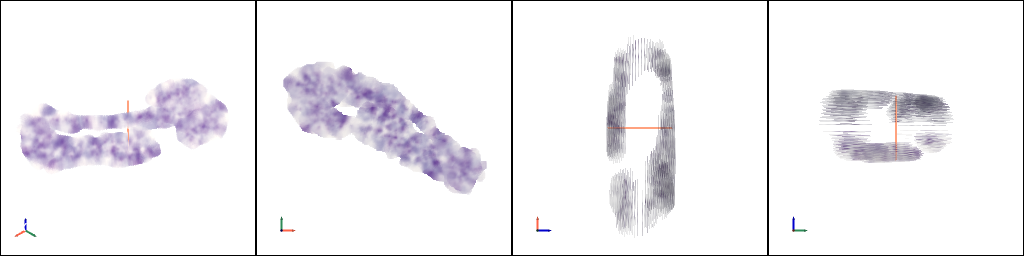

In [10]:
plot_2d(x=z_x, y=z_y, jupyter="static", save_image=None)
plot_2d(x=z_x, y=z_y, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{gene}_along_z_axis.tiff"))
visualization(slices=z_slices, line=z_line, jupyter="static", save_image=None)
visualization(slices=z_slices, line=z_line, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{gene}_slics_along_z_axis.tiff"))

#### Along another vector direction

In [11]:
vec_x, vec_y, vec_slices, vec_line = st.tdr.changes_along_line(model=interpolate_voxel, key=gene, vec=(1, 1, 1), center=None)

|-----> Slice the model uniformly along the vector `vec` and generate 100 slices. There are 13 empty slices, 87 valid slices in all slices.


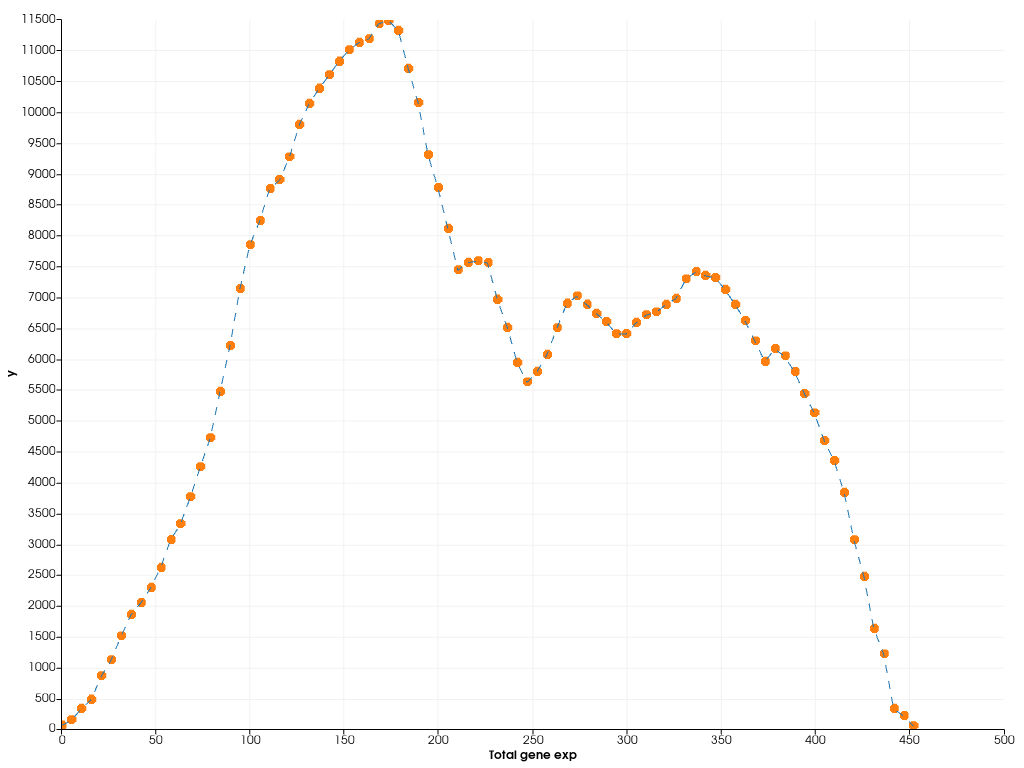

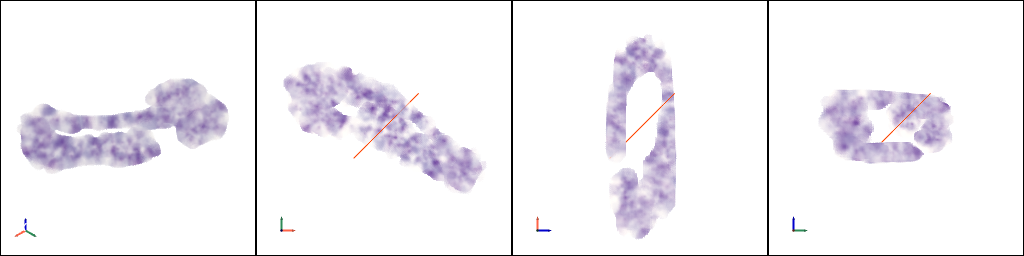

In [12]:
plot_2d(x=vec_x, y=vec_y, jupyter="static", save_image=None)
plot_2d(x=vec_x, y=vec_y, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{gene}_along_vec_axis.tiff"))
visualization(slices=vec_slices, line=vec_line, jupyter="static", save_image=None)
visualization(slices=vec_slices, line=vec_line, jupyter=False,
              save_image=os.path.join(save_cellbin_tdr_image_folder, f"{gene}_slics_along_vec_axis.tiff"))

### Transform gene expression change levels into two dimensions by DDRtree

iter =  0 obj =  (6951854919.0791+0j)
iter =  1 obj =  (195563519.63604373+0j)
iter =  2 obj =  (195563519.63604373+0j)
iter =  3 obj =  (195563519.63604373+0j)
iter =  4 obj =  (195563519.63604373+0j)
iter =  5 obj =  (195563519.63604373+0j)
iter =  6 obj =  (195563519.63604373+0j)
iter =  7 obj =  (195563519.63604373+0j)
iter =  8 obj =  (195563519.63604373+0j)
iter =  9 obj =  (195563519.63604373+0j)


<AxesSubplot:xlabel='x', ylabel='y'>

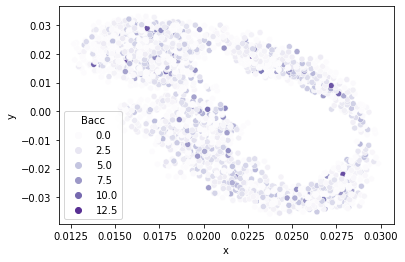

In [14]:
st.tdr.changes_along_shape(model=pc, dim=2, key_added = "rd_spatial", inplace=True)

data = pd.DataFrame(pc["rd_spatial"][:, ], columns=["x", "y"])
data[gene] = pc[gene]
sns.scatterplot(data=data, x="x", y="y", hue=gene, palette="Purples")